# Analytics workbench example

importing the required module

In [1]:
from analytics_workbench.read_data import DataReader
from analytics_workbench.preprocessing import PreProcessor
from analytics_workbench.unsupervised_learning import Unsupervised
from analytics_workbench.supervised_learning import ClassificationModelCV
from analytics_workbench.model_diagnostics import ClassificationModelDiagnotstics

### Reading data
DataReader can be used to read data from csv/excel files or from postgres queries

In [2]:
reader = DataReader()
df = reader.read_excel('ecommerce_sample_data_for_ui_with_people1.xls')
df.shape

(3686, 43)

### looking at the data

In [3]:
df.head()

,name,designation,location_person,linkedin_url,company_name,no_of_employees,sector,company_type,headquarters,description,...,product_categories,browse_and_filter,faceted_search,recommendation_coll_filtering,visual_merchandising,people_linkedin_url,first_name,middle_name,last_name,email
0,Aamir Baig,"Co-Founder, CEO Bryght.com",Canada,https://www.linkedin.com/company/bryght-com,Bryght.com,11-50 employees,Retail,Privately Held,"520 Alexander St Vancouver, BC V6A 1C7 Canada",Article (formerly Bryght) delivers beautifully...,...,NaN,0,1,1,1,https://www.linkedin.com/in/abaig,Aamir,NaN,Baig,Aamir.Baig@article.com
1,Aaron Beadle,Head of Infrastructure & Technology at Flubit ...,"Chelmsford, United Kingdom",https://www.linkedin.com/company/flubit-limited,Flubit,51-200 employees,Retail,Privately Held,"Metropolitan Wharf Wapping London, E1W 3SS Uni...",Found something you want to buy online? Want ...,...,NaN,0,0,0,0,https://www.linkedin.com/in/aaron-beadle-58b80342,Aaron,NaN,Beadle,Aaron.Beadle@flubit.com
2,Aaron Duncan,Chief Marketing Officer & Creative Director at...,"New York, New York",https://www.linkedin.com/company/the-sak,The Sak,51-200 employees,Apparel & Fashion,Privately Held,United States,Longtime friends Mark Talucci and Todd Elliott...,...,NaN,0,0,0,1,https://www.linkedin.com/in/aaronjduncan,Aaron,NaN,Duncan,Aaron.Duncan@thesak.com
3,Aaron Firestein,Co-Founder and Chief Artist at BucketFeet,Greater Chicago Area,https://www.linkedin.com/company/bucketfeet,BucketFeet,11-50 employees,Apparel & Fashion,Privately Held,"935 West Randolph Floor Two Chicago, IL 60607 ...",About BucketFeet. BucketFeet’s mission is to c...,...,NaN,1,0,0,1,https://www.linkedin.com/in/aaron-firestein-3a...,Aaron,NaN,Firestein,Aaron.Firestein@bucketfeet.com
4,Aaron Harari,"President & CEO, Legwear. At Basic Resources, ...",Greater New York City Area,https://www.linkedin.com/company/basic-resourc...,"Basic Resources, Inc.",51-200 employees,Apparel & Fashion,Privately Held,"1411 Braodway 2nd Floor New York, New York 100...","Since our founding in 1993, Basic Resources ha...",...,NaN,1,1,0,0,https://www.linkedin.com/in/aaron-harari-53423213,Aaron,NaN,Harari,Aaron.Harari@basicresources.com


In [4]:
df.columns

Index([u'name', u'designation', u'location_person', u'linkedin_url',
       u'company_name', u'no_of_employees', u'sector', u'company_type',
       u'headquarters', u'description', u'founded', u'specialties', u'website',
       u'domain', u'location', u'region', u'country', u'wtech_names',
       u'first_funding_at', u'last_funding_at', u'funding_rounds',
       u'funding_amount', u'last_funded_at', u'funding_level',
       u'funding_round_code', u'last_raised_amount_usd', u'valuation',
       u'average_transaction_value', u'no_of_products',
       u'no_of_unique_visitors', u'all_locations', u'channel_presence',
       u'market_place_type', u'product_categories', u'browse_and_filter',
       u'faceted_search', u'recommendation_coll_filtering',
       u'visual_merchandising', u'people_linkedin_url', u'first_name',
       u'middle_name', u'last_name', u'email'],
      dtype='object')

### columns with data which can be used for analysis

In [5]:
valid_cols = ['no_of_employees', 'sector', 'company_type', 'description', 'founded', 'specialties',
             'country','funding_rounds','funding_amount','no_of_products', 'no_of_unique_visitors',
             'channel_presence', 'market_place_type', 'browse_and_filter', 'faceted_search',
           'recommendation_coll_filtering', 'visual_merchandising']
df_valid = df[valid_cols]
df_valid.head()

,no_of_employees,sector,company_type,description,founded,specialties,country,funding_rounds,funding_amount,no_of_products,no_of_unique_visitors,channel_presence,market_place_type,browse_and_filter,faceted_search,recommendation_coll_filtering,visual_merchandising
0,11-50 employees,Retail,Privately Held,Article (formerly Bryght) delivers beautifully...,2011.0,"Retail, Wholesale, Furniture, Dining Room Furn...",CANADA,NaN,NaN,"0-5,000","0-50,000",Online,Info Aggregator,0,1,1,1
1,51-200 employees,Retail,Privately Held,Found something you want to buy online? Want ...,2011.0,"ecommerce, native commerce, retail, online mar...",UNITED KINGDOM,NaN,NaN,"5,000-50,000","200,000-1,000,000",Online,Comparison Shopping,0,0,0,0
2,51-200 employees,Apparel & Fashion,Privately Held,Longtime friends Mark Talucci and Todd Elliott...,NaN,NaN,UNITED STATES,NaN,NaN,"500,000-1,000,000","1,000,000-5,000,000",Mobile,Peer-2-Peer,0,0,0,1
3,11-50 employees,Apparel & Fashion,Privately Held,About BucketFeet. BucketFeet’s mission is to c...,2011.0,"Footwear, Art, Fashion, E-Commerce",UNITED STATES,3.0,2160000.0,"500,000-1,000,000","5,000,000-10,000,000",MultiChannel,Merchants,1,0,0,1
4,51-200 employees,Apparel & Fashion,Privately Held,"Since our founding in 1993, Basic Resources ha...",1993.0,"Premier Global Manufacturer, Loungewear, Under...",UNITED STATES,NaN,NaN,"200,000-500,000","1,000,000-5,000,000",MultiChannel,Merchants,1,1,0,0


### handling missing values

In [6]:
# filling missing values
df_valid.loc[:,['no_of_employees','sector','company_type','country','channel_presence','market_place_type',
          'no_of_products','no_of_unique_visitors']] = \
df_valid.loc[:,['no_of_employees','sector','company_type','country','channel_presence','market_place_type',
         'no_of_products','no_of_unique_visitors']].\
fillna('no data')
df_valid.loc[:,['description','specialties']] = df_valid.loc[:,['description','specialties']].fillna('')
df_valid.loc[:,['funding_rounds','funding_amount']] = df_valid.loc[:,['funding_rounds','funding_amount']].fillna(0)
df_valid.loc[:,['browse_and_filter','faceted_search','recommendation_coll_filtering','visual_merchandising']] = \
df_valid.loc[:,['browse_and_filter','faceted_search','recommendation_coll_filtering','visual_merchandising']].fillna(0)

/usr/local/lib/python2.7/dist-packages/pandas/core/indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [7]:
#treating founded year : find how old is the company
df_valid.loc[:,'founded'] = 2017-df_valid['founded'].fillna(2017)

### Final data which can be given to pre-processing module

In [8]:
df_valid.head()

,no_of_employees,sector,company_type,description,founded,specialties,country,funding_rounds,funding_amount,no_of_products,no_of_unique_visitors,channel_presence,market_place_type,browse_and_filter,faceted_search,recommendation_coll_filtering,visual_merchandising
0,11-50 employees,Retail,Privately Held,Article (formerly Bryght) delivers beautifully...,6.0,"Retail, Wholesale, Furniture, Dining Room Furn...",CANADA,0.0,0.0,"0-5,000","0-50,000",Online,Info Aggregator,0,1,1,1
1,51-200 employees,Retail,Privately Held,Found something you want to buy online? Want ...,6.0,"ecommerce, native commerce, retail, online mar...",UNITED KINGDOM,0.0,0.0,"5,000-50,000","200,000-1,000,000",Online,Comparison Shopping,0,0,0,0
2,51-200 employees,Apparel & Fashion,Privately Held,Longtime friends Mark Talucci and Todd Elliott...,0.0,,UNITED STATES,0.0,0.0,"500,000-1,000,000","1,000,000-5,000,000",Mobile,Peer-2-Peer,0,0,0,1
3,11-50 employees,Apparel & Fashion,Privately Held,About BucketFeet. BucketFeet’s mission is to c...,6.0,"Footwear, Art, Fashion, E-Commerce",UNITED STATES,3.0,2160000.0,"500,000-1,000,000","5,000,000-10,000,000",MultiChannel,Merchants,1,0,0,1
4,51-200 employees,Apparel & Fashion,Privately Held,"Since our founding in 1993, Basic Resources ha...",24.0,"Premier Global Manufacturer, Loungewear, Under...",UNITED STATES,0.0,0.0,"200,000-500,000","1,000,000-5,000,000",MultiChannel,Merchants,1,1,0,0


### Creating a sample dv to test the code
(let the dv be a 0/1 flag to predict if the sector is in Internet/Computer Software/Information Technology and Services) 

In [9]:
dv = df_valid['sector'].isin(['Internet','Computer Software','Information Technology and Services'])
dv.value_counts()

False    2876
True      810
Name: sector, dtype: int64

### Splitting the data into train and test

In [10]:
#train test split
from numpy.random import rand
msk = rand(df_valid.shape[0]) < 0.8
df_train,df_test,dv_train,dv_test = df_valid[msk],df_valid[~msk],dv[msk],dv[~msk]

## Pre-processing the data
### Parameters
text_cols : Text columns in the data. They will be combined and converted into bag of words/phrases matrix

categorical_cols : Categorical variables. A binary flag will be created for each category

numeric_cols : will be used directly

#### Text processing related options:
vectorizer_type : Can be Count or Tfidf

synonym_loc : location of a file were synonyms are stored. All the synonyms will be represented by a single word

stem_type : stemming/lemmatization will be done if this option is set

phrase_generation : If this option is set to True, phrases will be generated from text.

stop_words_loc : Give customer stop words in this location. They will be added to default list of stopwords.

lower : All texts will be converted to lower-case

n_gram_range : 

max_df and min_df : words happening within these ranges will be present in the output (can be fraction or number)

vocabulary_loc : If vocabulary is already generated, give its location. Only those words will be present in the output

#### Other options:

sparse_format : if True, the output will be in sparse format, otherwise in dense format

scaling : Scaling to be performed on the data (Many algorithms need scaled data). Can be max_abs_scaling (for sparse data) or standard_scaler (will not work on sparse data)

In [11]:
preprocessor = PreProcessor()
text_cols = ['description','specialties']
categorical_cols = ['no_of_employees','company_type','country','channel_presence','market_place_type',
          'no_of_products','no_of_unique_visitors','sector']
numeric_cols = ['recommendation_coll_filtering', 'visual_merchandising', 'funding_rounds', u'founded', 
                u'funding_amount', u'faceted_search', u'browse_and_filter']
X_train,column_names = preprocessor.build_matrix_train(df_train,text_cols=text_cols,categorical_cols=categorical_cols,
                   numeric_cols=numeric_cols,vectorizer_type='Count',synonym_loc='sample_synonyms.txt',
                   stem_type=None,phrase_generation=False,stop_words_loc=None,lower=True,n_gram_range=(1,2),
                   max_df=0.9,min_df=0.05,vocabulary_loc=None,sparse_format=True,scaling='max_abs_scaling')

analytics_workbench/preprocessing.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_categorical[col] = df_categorical[col].astype('category')


### Using the module, get the matrix for new data

In [12]:
X_test,column_names = preprocessor.get_matrix_test(df_test)

analytics_workbench/preprocessing.py:158: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_categorical[col] = df_categorical[col].astype('category',categories=self.categories_dic[col])


### verify that both outputs have same no of columns

In [13]:
X_train.shape,X_test.shape

((2978, 398), (708, 398))

## Building supervised model
Supported options as of now are multinomial naive bayes,logistic regression,linear svm,svm,random forest

In [14]:
predictive_model = ClassificationModelCV(model_algorithm='logistic regression',scoring='f1_weighted')

In [15]:
predictive_model.fit(X_train,dv_train)

/usr/local/lib/python2.7/dist-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### predicting on the test data

In [16]:
predictive_model.predict(X_test)[:10]

array([False, False, False, False, False,  True, False, False,  True,  True], dtype=bool)

### Looking at best model

In [17]:
predictive_model.clf_search.best_params_

{'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l1'}

## Model diagnostics
Measure model performance

In [18]:
diagnost = ClassificationModelDiagnotstics()

classification report
             precision    recall  f1-score   support

      False       1.00      1.00      1.00      2317
       True       1.00      1.00      1.00       661

avg / total       1.00      1.00      1.00      2978

AUC is 1.0


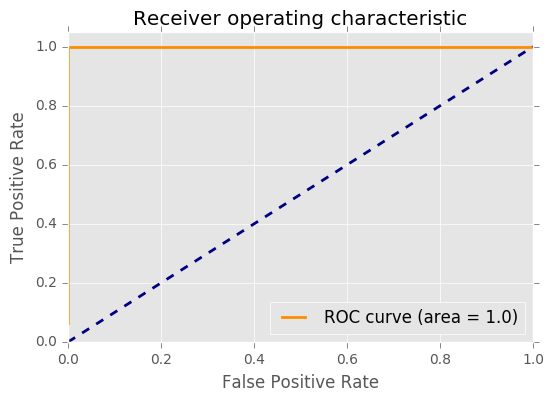

KS statistic
    min_scr   max_scr  goods  bads  total  odds bad_rate      ks max_ks
0  0.012123  0.012243    0.0   819  819.0  0.00  100.00%   35.35       
1  0.012265  0.025394    0.0   720  720.0  0.00  100.00%   66.42       
2  0.025412  0.025676    0.0   401  401.0  0.00  100.00%   83.73       
3  0.025793  0.150856    0.0   226  226.0  0.00  100.00%   93.48       
4  0.152000  0.160937    0.0   151  151.0  0.00  100.00%  100.00  <----
5  0.927208  0.932660   67.0     0   67.0   inf    0.00%   89.86       
6  0.932696  0.935623   46.0     0   46.0   inf    0.00%   82.90       
7  0.935648  0.937402   30.0     0   30.0   inf    0.00%   78.37       
8  0.937453  0.990325  226.0     0  226.0   inf    0.00%   44.18       
9  0.990343  0.990512  292.0     0  292.0   inf    0.00%    0.00       


analytics_workbench/model_diagnostics.py:140: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  agg2 = (agg1.sort_index(by = 'min_scr')).reset_index(drop = True)


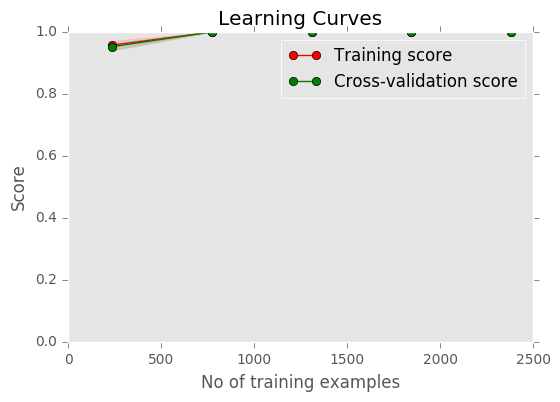

In [19]:
diagnost.run_diagnostics(predictive_model.clf_search.best_estimator_,X_train,
                             dv_train,binary_classification=True)

## Unsupervised Learning

In [20]:
# create the object
unsup_obj = Unsupervised()

### Clustering

In [23]:
# pre-processor object to create the data matrix
preprocessor = PreProcessor()
text_cols = []
categorical_cols = ['no_of_employees','company_type','country','channel_presence','market_place_type',
          'no_of_products','no_of_unique_visitors','sector']
numeric_cols = ['recommendation_coll_filtering', 'visual_merchandising', 'funding_rounds', u'founded', 
                u'funding_amount', u'faceted_search', u'browse_and_filter']
X,column_names = preprocessor.build_matrix_train(df_valid,text_cols=text_cols,categorical_cols=categorical_cols,
                   numeric_cols=numeric_cols,vectorizer_type='Count',synonym_loc='sample_synonyms.txt',
                   stem_type=None,phrase_generation=False,stop_words_loc=None,lower=True,n_gram_range=(1,2),
                   max_df=0.9,min_df=0.05,vocabulary_loc=None,sparse_format=False,scaling='standard_scaler')
X.shape

(3686, 157)

In [24]:
kmeans_obj,clusters,clust_distances = unsup_obj.generate_clusters(X,feature_names=column_names,num_clusters=10)

No of items in each cluster
0    1038
5     527
1     524
2     518
9     498
8     485
3      93
7       1
6       1
4       1
dtype: int64
Top terms per cluster:
()
Cluster 0: no_of_unique_visitors_>10,000,000, no_of_unique_visitors_Not Available, no_of_products_Not Available, no_of_products_>1,000,000, sector_Internet, country_CHINA, country_BRAZIL, company_type_Public Company, country_ARGENTINA, country_KUWAIT
Cluster 1: no_of_unique_visitors_200,000-1,000,000, no_of_products_50,000-200,000, no_of_products_200,000-500,000, no_of_products_5,000-50,000, country_BHUTAN, country_SPAIN, sector_Consumer Electronics, country_GERMANY, sector_Computer Games, sector_Supermarkets
Cluster 2: no_of_unique_visitors_1,000,000-5,000,000, no_of_products_500,000-1,000,000, no_of_products_50,000-200,000, no_of_products_200,000-500,000, country_BELGIUM, sector_Apparel & Fashion, sector_Warehousing, sector_Automotive, country_THAILAND, country_COLOMBIA
Cluster 3: sector_Computer Software, company_type_

#### now we have to look at the cluster ids and corresponding columns to identify each cluster

## Topic Extraction
Supports Latent Dirichlet Allocation(lda) and Non-negative Matrix Factorization(nmf)

In [ ]:
# Pre-procssing
preprocessor = PreProcessor()
text_cols = ['description','specialties']
categorical_cols = []
numeric_cols = []
X,column_names = preprocessor.build_matrix_train(df_valid,text_cols=text_cols,categorical_cols=categorical_cols,
                   numeric_cols=numeric_cols,vectorizer_type='Count',synonym_loc='sample_synonyms.txt',
                   stem_type=None,phrase_generation=False,
             stop_words_loc='/home/madan/Desktop/joswin_bck/toPendrive/works/chargebee_works/nlp-intelligence/scoring_lists/tradegecko_jan31/stopwords.txt',
                 lower=True,n_gram_range=(1,2),
                   max_df=0.9,min_df=0.05,vocabulary_loc=None,sparse_format=True,scaling=None)

In [ ]:
topic_extr_obj, X_transformed =  unsup_obj.generate_topics(X,feature_names=column_names,algorithm='lda',
                                                           n_topics=10,n_top_words=10)